## **Assignment 4**

*Sugam Arora 21105021*

1. Multiprogramming System

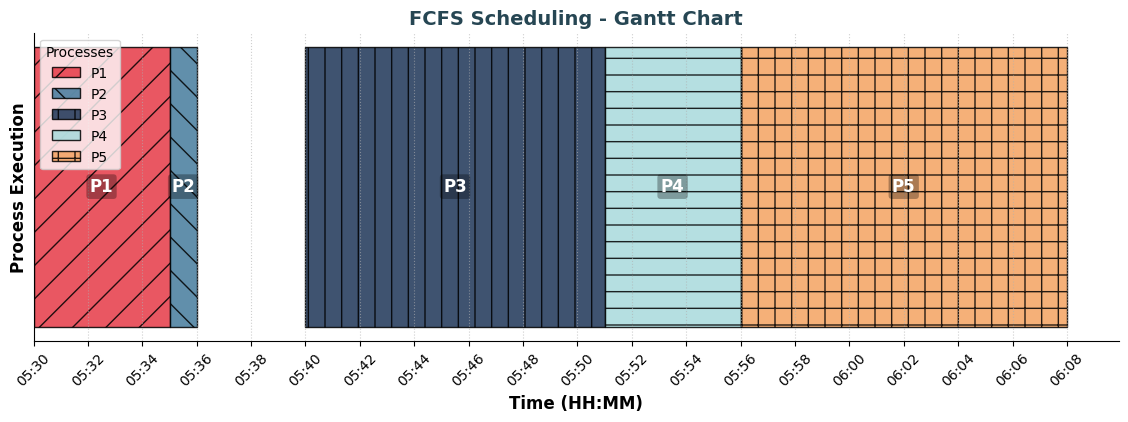

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),  # Converting PM time into minutes from 5:00 PM
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Sort processes by arrival time for FCFS
fcfs_schedule = sorted(processes, key=lambda x: x[1])

# Compute start and end times for FCFS
start_time = fcfs_schedule[0][1]  # First process arrival time
gantt_fcfs = []
for process in fcfs_schedule:
    process_id, arrival, burst = process
    if start_time < arrival:
        start_time = arrival  # Wait until the process arrives
    end_time = start_time + burst
    gantt_fcfs.append((process_id, start_time, end_time))
    start_time = end_time

# Convert time from minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels at every 1-minute step
time_range = range(gantt_fcfs[0][1], gantt_fcfs[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# Define a **unique color palette** (distinct, modern, visually appealing)
colors = ["#E63946", "#457B9D", "#1D3557", "#A8DADC", "#F4A261"]

# Define **hatch patterns** to add a **gradient-like effect**
hatch_patterns = ['/', '\\', '|', '-', '+']

# Plot Gantt Chart for FCFS
plt.figure(figsize=(14, 4))

for i, (process_id, start, end) in enumerate(gantt_fcfs):
    plt.barh(y=0, width=end - start, left=start, height=0.5,
             color=colors[i % len(colors)], edgecolor="black", alpha=0.85,
             hatch=hatch_patterns[i % len(hatch_patterns)], label=process_id)

    # Add process name inside the bars
    plt.text((start + end) / 2, 0, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold", bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# Formatting the plot with 1-minute steps
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Show every 2nd tick for readability
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Process Execution", fontsize=12, fontweight="bold")
plt.title("FCFS Scheduling - Gantt Chart", fontsize=14, fontweight="bold", color="#264653")

# Remove default Y-ticks to make it cleaner
plt.yticks([])

# Move legend outside the plot for better visibility
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# Add grid with **dotted** style for a **modern look**
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# Enhance the border aesthetics
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()

2. Multiprogramming with Shortest Job First (Non-Preemptive)

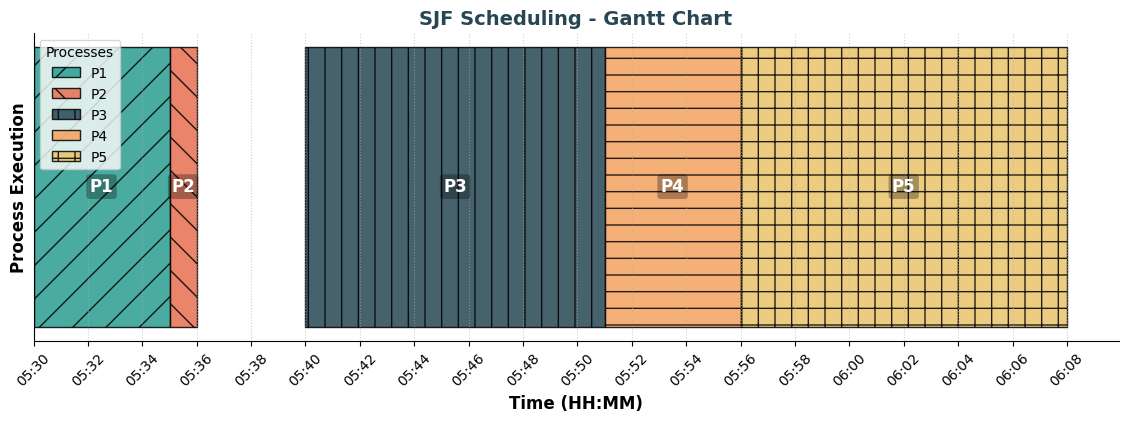

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),  # Converting PM time into minutes from 5:00 PM
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Sort processes by burst time for SJF
sjf_schedule = sorted(processes, key=lambda x: x[2])

# Compute start and end times for SJF
current_time = 0
gantt_sjf = []
completed_processes = []

# Iterate while all processes are not completed
while len(completed_processes) < len(processes):
    eligible_processes = [p for p in sjf_schedule if p[1] <= current_time and p not in completed_processes]

    # If no process is eligible at the current time, move forward
    if not eligible_processes:
        current_time += 1
        continue

    # Select process with the shortest burst time
    next_process = min(eligible_processes, key=lambda x: x[2])

    process_id, arrival, burst = next_process
    start_time = max(current_time, arrival)  # Start time is either current time or arrival time
    end_time = start_time + burst
    gantt_sjf.append((process_id, start_time, end_time))
    completed_processes.append(next_process)
    current_time = end_time

# Convert minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels
time_range = range(gantt_sjf[0][1], gantt_sjf[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# Define a **unique color palette** (modern, readable, and non-default)
colors = ["#2A9D8F", "#E76F51", "#264653", "#F4A261", "#E9C46A"]

# Define **hatch patterns** for a visually distinct appearance
hatch_patterns = ['/', '\\', '|', '-', '+']

# Plot Gantt Chart for SJF
plt.figure(figsize=(14, 4))

for i, (process_id, start, end) in enumerate(gantt_sjf):
    plt.barh(y=0, width=end - start, left=start, height=0.5,
             color=colors[i % len(colors)], edgecolor="black", alpha=0.85,
             hatch=hatch_patterns[i % len(hatch_patterns)], label=process_id)

    # Add process name inside the bars
    plt.text((start + end) / 2, 0, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold",
             bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# Formatting the plot
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Show every 2nd tick for better readability
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Process Execution", fontsize=12, fontweight="bold")
plt.title("SJF Scheduling - Gantt Chart", fontsize=14, fontweight="bold", color="#264653")

# Remove default Y-ticks for cleaner visualization
plt.yticks([])

# Move legend outside the plot for better visibility
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# Add **dotted** gridlines for modern aesthetics
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# Enhance the border aesthetics (remove top & right border)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()

3. Multiprogramming with Shortest Job First (Preemptive)

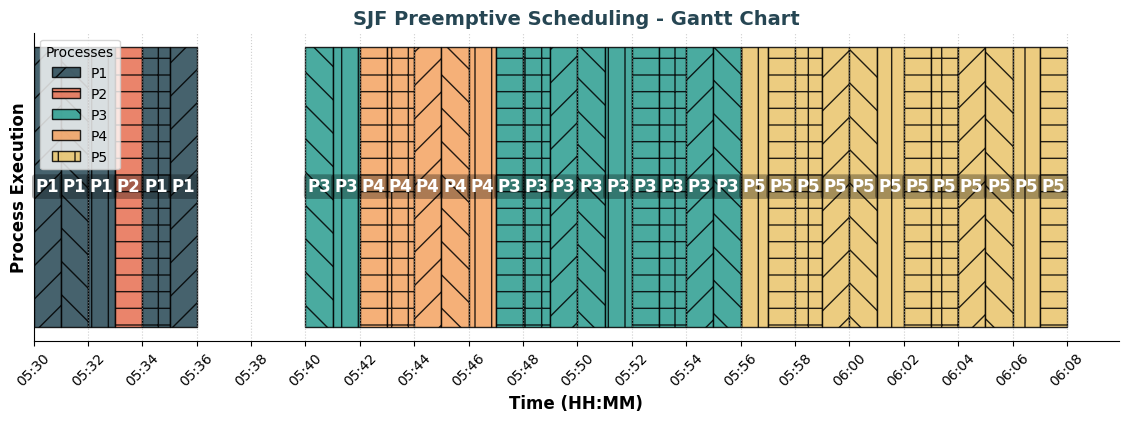

In [9]:
import matplotlib.pyplot as plt

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Updated **modern color palette** for better differentiation
colors = {
    "P1": "#264653",  # Dark Blue-Green
    "P2": "#E76F51",  # Red-Orange
    "P3": "#2A9D8F",  # Teal-Green
    "P4": "#F4A261",  # Yellow-Orange
    "P5": "#E9C46A"   # Soft Yellow
}

# **Hatch patterns** for distinction in preemptive switching
hatch_patterns = ['/', '\\', '|', '-', '+']

# Copy burst times for tracking remaining times
remaining_time = {p[0]: p[2] for p in processes}
completed_processes = []
current_time = min(p[1] for p in processes)  # Start at first process arrival time
gantt_sjf_preemptive = []

# Run scheduling until all processes are completed
while len(completed_processes) < len(processes):
    # Get available processes that have arrived and are not completed
    available_processes = [p for p in processes if p[1] <= current_time and p[0] not in completed_processes]

    if available_processes:
        # Select the process with the **shortest remaining time**
        next_process = min(available_processes, key=lambda p: remaining_time[p[0]])
        process_id = next_process[0]

        # Execute the process for 1 time unit
        gantt_sjf_preemptive.append((process_id, current_time, current_time + 1))
        remaining_time[process_id] -= 1  # Reduce remaining time
        current_time += 1

        # If the process finishes execution, mark it as completed
        if remaining_time[process_id] == 0:
            completed_processes.append(process_id)
    else:
        # If no process is ready, increment time
        current_time += 1

# Convert minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels
time_range = range(gantt_sjf_preemptive[0][1], gantt_sjf_preemptive[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# **Plot Gantt Chart for SJF Preemptive**
plt.figure(figsize=(14, 4))

for i, (process_id, start, end) in enumerate(gantt_sjf_preemptive):
    plt.barh(y=0, width=end-start, left=start, height=0.5,
             color=colors[process_id], edgecolor="black", alpha=0.85,
             hatch=hatch_patterns[i % len(hatch_patterns)], label=process_id if process_id not in [p[0] for p in gantt_sjf_preemptive[:i]] else "")

    # **Add process name inside the bars**
    plt.text((start + end) / 2, 0, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold",
             bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# **Formatting the plot**
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Reduce clutter with step-2
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Process Execution", fontsize=12, fontweight="bold")
plt.title("SJF Preemptive Scheduling - Gantt Chart", fontsize=14, fontweight="bold", color="#264653")

# **Hide Y-axis labels for a cleaner look**
plt.yticks([])

# **Move legend outside the plot for clarity**
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# **Dotted grid for better visualization**
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# **Enhance border aesthetics**
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()

4. Time-Sharing System (Time Slice = 2 Units)

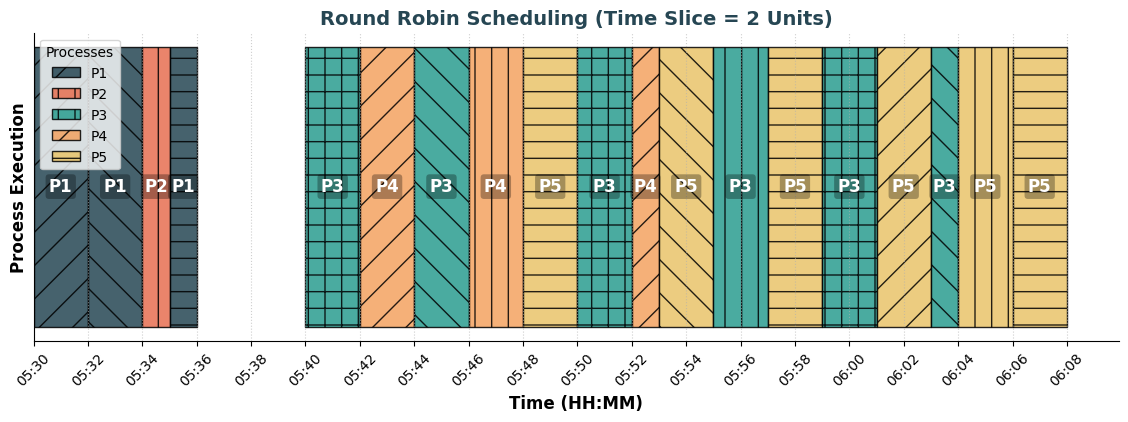

In [10]:
import matplotlib.pyplot as plt
from collections import deque

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Time quantum (slice)
time_slice = 2

# Queue for Round Robin
queue = deque()
remaining_time = {p[0]: p[2] for p in processes}  # Remaining burst time
completed_processes = []
gantt_rr = []
current_time = min(p[1] for p in processes)  # Start at first process arrival time
arrival_index = 0  # Track new arrivals

# Updated **modern color palette** for better differentiation
colors = {
    "P1": "#264653",  # Dark Blue-Green
    "P2": "#E76F51",  # Red-Orange
    "P3": "#2A9D8F",  # Teal-Green
    "P4": "#F4A261",  # Yellow-Orange
    "P5": "#E9C46A"   # Soft Yellow
}

# **Hatch patterns** for distinct visualization
hatch_patterns = ['/', '\\', '|', '-', '+']

# Run scheduling until all processes are completed
while len(completed_processes) < len(processes):
    # Add newly arrived processes to the queue in order
    for i in range(arrival_index, len(processes)):
        if processes[i][1] <= current_time:
            queue.append(processes[i][0])
            arrival_index += 1
        else:
            break

    if queue:
        process_id = queue.popleft()  # Get the next process in queue

        # Execute the process for up to 2 units
        execution_time = min(time_slice, remaining_time[process_id])
        gantt_rr.append((process_id, current_time, current_time + execution_time))

        # Update remaining time
        remaining_time[process_id] -= execution_time
        current_time += execution_time

        # Add newly arrived processes to the queue before re-adding the current one
        for i in range(arrival_index, len(processes)):
            if processes[i][1] <= current_time and processes[i][0] not in queue and processes[i][0] not in completed_processes:
                queue.append(processes[i][0])
                arrival_index += 1

        # If process still has burst time left, re-add it to queue
        if remaining_time[process_id] > 0:
            queue.append(process_id)
        else:
            completed_processes.append(process_id)
    else:
        # If no process is ready, increment time
        current_time += 1

# Convert minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels
time_range = range(gantt_rr[0][1], gantt_rr[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# **Plot Gantt Chart for Round Robin**
plt.figure(figsize=(14, 4))

for i, (process_id, start, end) in enumerate(gantt_rr):
    plt.barh(y=0, width=end-start, left=start, height=0.5,
             color=colors[process_id], edgecolor="black", alpha=0.85,
             hatch=hatch_patterns[i % len(hatch_patterns)], label=process_id if process_id not in [p[0] for p in gantt_rr[:i]] else "")

    # **Add process name inside the bars**
    plt.text((start + end) / 2, 0, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold",
             bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# **Formatting the plot**
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Reduce clutter with step-2
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Process Execution", fontsize=12, fontweight="bold")
plt.title("Round Robin Scheduling (Time Slice = 2 Units)", fontsize=14, fontweight="bold", color="#264653")

# **Hide Y-axis labels for a cleaner look**
plt.yticks([])

# **Move legend outside the plot for clarity**
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# **Dotted grid for better visualization**
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# **Enhance border aesthetics**
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()

5. Multiprocessing System (3 Processors)

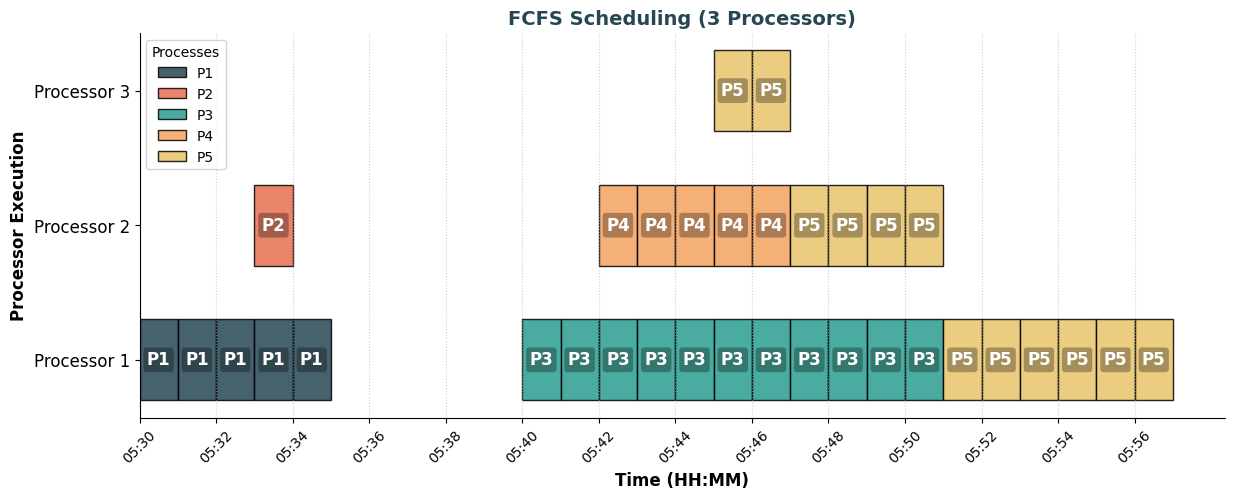

In [11]:
import matplotlib.pyplot as plt

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Number of processors
num_processors = 3

# Sort processes by arrival time (FCFS order)
processes.sort(key=lambda p: p[1])

# Initialize execution tracking
current_time = min(p[1] for p in processes)  # Start at first process arrival time
remaining_time = {p[0]: p[2] for p in processes}  # Track remaining burst time
completed_processes = []
processor_queue = []
gantt_fcfs_multi = []
processor_assignment = {}

# **Modern color palette for better distinction**
colors = {
    "P1": "#264653",  # Dark Blue-Green
    "P2": "#E76F51",  # Red-Orange
    "P3": "#2A9D8F",  # Teal-Green
    "P4": "#F4A261",  # Yellow-Orange
    "P5": "#E9C46A"   # Soft Yellow
}

# Simulate execution
while len(completed_processes) < len(processes):
    # Add newly arrived processes to the queue
    for p in processes:
        if p[1] <= current_time and p[0] not in processor_queue and p[0] not in completed_processes:
            processor_queue.append(p[0])

    # Assign up to 3 processes to available processors
    running_processes = processor_queue[:num_processors]

    for process_id in running_processes:
        execution_time = min(remaining_time[process_id], 1)  # Execute for 1 unit
        processor_index = running_processes.index(process_id)
        gantt_fcfs_multi.append((process_id, current_time, current_time + execution_time, processor_index))
        remaining_time[process_id] -= execution_time
        processor_assignment[process_id] = processor_index  # Assign processor index

        # If process completes, remove it
        if remaining_time[process_id] == 0:
            completed_processes.append(process_id)
            processor_queue.remove(process_id)

    current_time += 1  # Move time forward

# Convert minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels
time_range = range(gantt_fcfs_multi[0][1], gantt_fcfs_multi[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# **Plot Gantt Chart for FCFS with 3 Processors**
plt.figure(figsize=(14, 5))

for i, (process_id, start, end, processor) in enumerate(gantt_fcfs_multi):
    plt.barh(y=processor, width=end-start, left=start, height=0.6,
             color=colors[process_id], edgecolor="black", alpha=0.85,
             label=process_id if process_id not in [p[0] for p in gantt_fcfs_multi[:i]] else "")

    # **Add process name inside the bars**
    plt.text((start + end) / 2, processor, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold",
             bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# **Formatting the plot**
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Reduce clutter with step-2
plt.yticks(range(num_processors), [f"Processor {i+1}" for i in range(num_processors)], fontsize=12)
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Processor Execution", fontsize=12, fontweight="bold")
plt.title("FCFS Scheduling (3 Processors)", fontsize=14, fontweight="bold", color="#264653")

# **Move legend outside the plot for clarity**
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# **Dotted grid for better visualization**
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# **Enhance border aesthetics**
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()

6. Multiprocessing Time-Sharing System (2 Processors, Time Slice = 2 units)

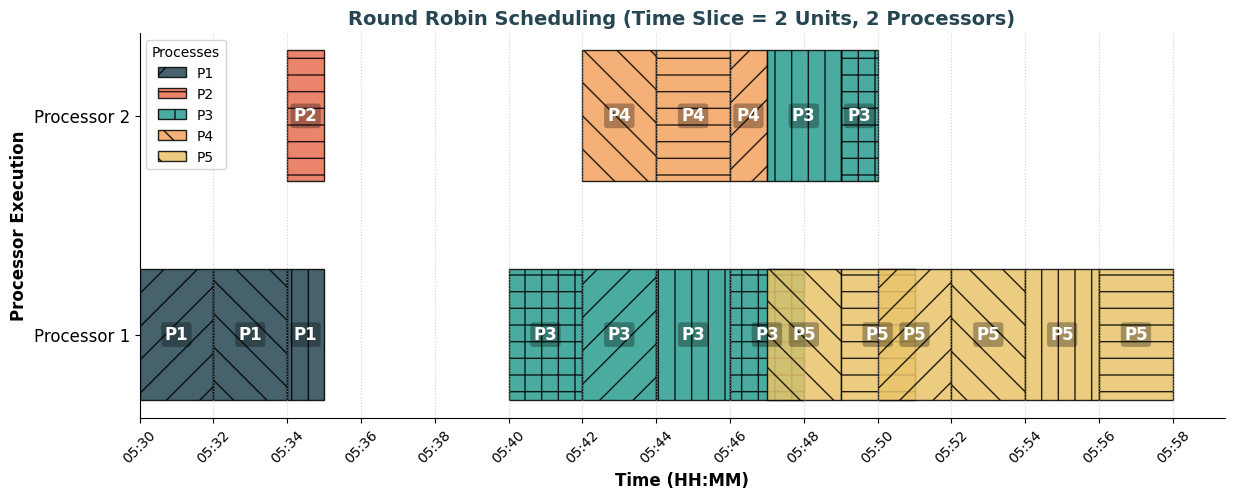

In [12]:
import matplotlib.pyplot as plt
from collections import deque

# Define process data (Process ID, Arrival Time, Burst Time)
processes = [
    ("P1", 5 * 60 + 30, 5),
    ("P2", 5 * 60 + 33, 1),
    ("P3", 5 * 60 + 40, 11),
    ("P4", 5 * 60 + 42, 5),
    ("P5", 5 * 60 + 45, 12)
]

# Number of processors
num_processors = 2
time_slice = 2  # Time quantum for Round Robin

# Sort processes by arrival time (to simulate queue correctly)
processes.sort(key=lambda p: p[1])

# Initialize execution tracking
current_time = min(p[1] for p in processes)  # Start at first process arrival time
remaining_time = {p[0]: p[2] for p in processes}  # Track remaining burst time
completed_processes = []
queue = deque()
gantt_rr_multi = []
processor_status = [None] * num_processors  # Track which process runs on which processor

# **Modern color palette for better distinction**
colors = {
    "P1": "#264653",  # Dark Blue-Green
    "P2": "#E76F51",  # Red-Orange
    "P3": "#2A9D8F",  # Teal-Green
    "P4": "#F4A261",  # Yellow-Orange
    "P5": "#E9C46A"   # Soft Yellow
}

# **Hatch patterns** for clear preemptive visualization
hatch_patterns = ['/', '\\', '|', '-', '+']

# Track process arrivals
arrival_index = 0

# Run scheduling until all processes are completed
while len(completed_processes) < len(processes):
    # Add newly arrived processes to the queue
    while arrival_index < len(processes) and processes[arrival_index][1] <= current_time:
        queue.append(processes[arrival_index][0])
        arrival_index += 1

    # Assign processes to available processors
    running_processes = []
    for i in range(num_processors):
        if processor_status[i] is None and queue:  # Assign new process if the processor is free
            process_id = queue.popleft()
            execution_time = min(time_slice, remaining_time[process_id])  # Execute for up to 2 units
            gantt_rr_multi.append((process_id, current_time, current_time + execution_time, i))
            remaining_time[process_id] -= execution_time
            processor_status[i] = process_id
            running_processes.append((process_id, execution_time, i))

    # Move time forward by the shortest execution time
    if running_processes:
        min_execution_time = min(exe_time for _, exe_time, _ in running_processes)
        current_time += min_execution_time
    else:
        current_time += 1  # If no process is available, move time forward

    # Mark completed processes and requeue unfinished ones
    for process_id, execution_time, processor in running_processes:
        if remaining_time[process_id] == 0:
            completed_processes.append(process_id)
            processor_status[processor] = None  # Free up processor
        else:
            queue.append(process_id)  # Re-add to queue for next cycle
            processor_status[processor] = None  # Free up processor for next process

# Convert minutes to HH:MM format
def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

# Generate time labels
time_range = range(gantt_rr_multi[0][1], gantt_rr_multi[-1][2] + 1, 1)
time_labels = [minutes_to_time(t) for t in time_range]

# **Plot Gantt Chart for Round Robin with 2 Processors**
plt.figure(figsize=(14, 5))

for i, (process_id, start, end, processor) in enumerate(gantt_rr_multi):
    plt.barh(y=processor, width=end-start, left=start, height=0.6,
             color=colors[process_id], edgecolor="black", alpha=0.85,
             hatch=hatch_patterns[i % len(hatch_patterns)], label=process_id if process_id not in [p[0] for p in gantt_rr_multi[:i]] else "")

    # **Add process name inside the bars**
    plt.text((start + end) / 2, processor, process_id, ha="center", va="center",
             fontsize=12, color="white", fontweight="bold",
             bbox=dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.2"))

# **Formatting the plot**
plt.xticks(time_range[::2], time_labels[::2], rotation=45, fontsize=10)  # Reduce clutter with step-2
plt.yticks(range(num_processors), [f"Processor {i+1}" for i in range(num_processors)], fontsize=12)
plt.xlabel("Time (HH:MM)", fontsize=12, fontweight="bold")
plt.ylabel("Processor Execution", fontsize=12, fontweight="bold")
plt.title("Round Robin Scheduling (Time Slice = 2 Units, 2 Processors)", fontsize=14, fontweight="bold", color="#264653")

# **Move legend outside the plot for clarity**
plt.legend(loc="upper left", title="Processes", frameon=True, fontsize=10)

# **Dotted grid for better visualization**
plt.grid(axis='x', linestyle=":", alpha=0.6, linewidth=0.8)

# **Enhance border aesthetics**
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Show plot
plt.show()